In [153]:
%matplotlib nbagg
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split


import session_info
session_info.show(html=False)

-----
matplotlib          3.7.1
numpy               1.23.5
pandas              2.0.1
seaborn             0.12.2
session_info        1.0.0
sklearn             1.0.2
statsmodels         0.13.2
-----
IPython             8.13.2
jupyter_client      6.1.12
jupyter_core        4.9.2
jupyterlab          3.3.2
notebook            6.4.8
-----
Python 3.9.7 (default, Sep 16 2021, 13:09:58) [GCC 7.5.0]
Linux-5.10.0-21-amd64-x86_64-with-glibc2.31
-----
Session information updated at 2023-06-09 16:51


- Exercici 1

Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.


- Exercici 2

Compara’ls en base al MSE i al R2.


- Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.


- Exercici 4

Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).


- Exercici 5

No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.




Enlloc de seguir l'ordre establert dels exercícis, crearem diferents seccions per a cada un dels models mostrant els passos exigits. Al final compararem el seu rendiment a través del MSE i l'R².

Primer de tot llegim el dataset i fem les modificacions necessàries. Aquest dataset ja ha estat analitzat anteriorment a: https://github.com/zonioi/IT_Academy_BA/blob/master/Sprint5/Tasca_M5_T02.ipynb

In [2]:
df = pd.read_csv('housing data.csv', names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                                            'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
df['CHAS'] = df['CHAS'].astype('category')
print(df.isna().value_counts())

df.head()

CRIM   ZN     INDUS  CHAS   NOX    RM     AGE    DIS    RAD    TAX    PTRATIO  B      LSTAT  MEDV 
False  False  False  False  False  False  False  False  False  False  False    False  False  False    506
Name: count, dtype: int64


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Separem les dades en 2 dataframes, train i test. També les normalitzarem

In [3]:
#from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3,random_state=20)

from sklearn.preprocessing import RobustScaler
trans = RobustScaler()

data1 = trans.fit_transform(train)
data2 = trans.fit_transform(test)

train_norm =  pd.DataFrame(data1, columns=train.columns)
test_norm = pd.DataFrame(data2, columns=test.columns)

## 1.1 Linear Regression (amb statsmodels)

Començarem utilitzant el model de regressió lineal per múltiples variables. En un primer moment, farem servir totes les columnes disponibles per entrenar el model. A seguir, farem el mateix amb les dades normalitzades per examinar si hi ha alguna diferència.

In [4]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [5]:
# definim features X i target y per l'entrenament i els tests per la regressió linear.

X_train = train.drop('MEDV', axis=1)
y_train = train['MEDV']

X_test = test.drop('MEDV', axis=1)
X_test = sm.add_constant(X_test)

y_test = test['MEDV']

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = sm.add_constant(X_train)

In [6]:
# Creem el model linear OLS (Ordinary Least Squares) i l'entrenem amb les dades d'entrenament.
model_lr1 = sm.OLS(y_train, X_train).fit()
print(model_lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     77.50
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           3.11e-93
Time:                        14:41:27   Log-Likelihood:                -1042.7
No. Observations:                 354   AIC:                             2113.
Df Residuals:                     340   BIC:                             2168.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.6879      5.955      4.817      0.0

En sumari de la llibreria statsmodel ens observem que hem obtingut un R² de 0.748. Això vol dir que el 74.8%  de la variació dels preus de les cases es pot explicar per totes les variables emprades del dataset (['CRIM','ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO','B','LSTAT']). Serà que amb menys variables podríem obtenir un resultat similar o millor? Això ho podrem veure mitjançant nous R-squared o el Log-Likelihood (-1042.7) en aquest cas. Quant més a prop de 0 millor.

La constant i les variables de la taula ens indiquen que per fer una previsió amb aquest model, la nostra equació seria:

28.6879 - CRIM*0.0619 + ZN*0.0281 + INDUS*0.0367 + ... - LSTAT*0.4558 = MEDV

També el p-value ens dóna una idea de quant cada una de les variables influeix estatísticament en el preu de les vivendes. Si el p-value és menor que 0.05 indica que hi ha una relació estatísticament significant entre la variable i la predicció.

Farem les prediccions amb aquest model amb la base de dades test utilitzant eines de la llibrería statsmodel. Les compararem amb els resultats reals i en calcularem l'error MSE.


MAE_lr1 =  3.39


<IPython.core.display.Javascript object>


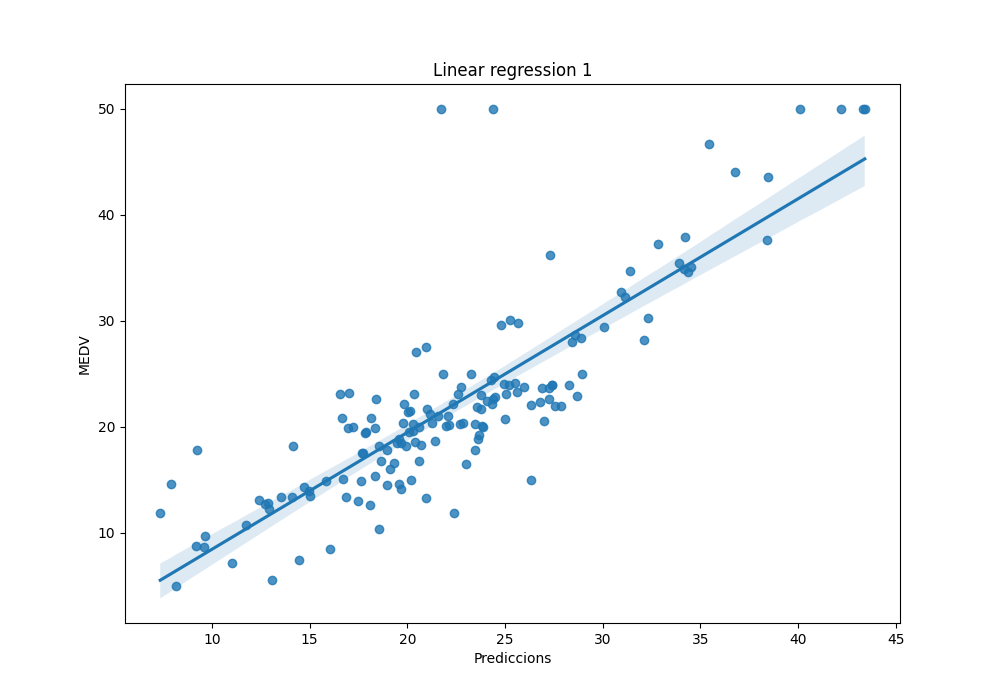

Text(0, 0.5, 'MEDV')

In [149]:
predictions_lr1 = model_lr1.predict(X_test)

def mae (prediccions, y_test):
    errors = abs(prediccions - y_test)
    # Print out the mean absolute error (mae)
    return round(np.mean(errors), 2)

print('MAE_lr1 = ', mae(predictions_lr1, y_test))

fig, ax = plt.subplots(figsize=(10,7))
sns.regplot(x=predictions_lr1, y=test['MEDV'])

plt.title('Linear regression 1')
plt.xlabel('Prediccions')
plt.ylabel('MEDV')

#### Per el model lr_1 hem obtingut un R²=0.748 i un MAE=3.39. 

Pel gràfic també observem que un model simple dóna un resultat acceptable. Considerant el p-value del model lr_1, farem un test només considerant NOX, RM, DIS,	PTRATIO, LSTAT, que són les variables amb p-value més baix. 

In [150]:
X_train = train[['NOX', 'RM','DIS','PTRATIO', 'B', 'LSTAT']]
y_train = train['MEDV']

X_test = test[['NOX', 'RM','DIS','PTRATIO', 'B', 'LSTAT']]
X_test = sm.add_constant(X_test)

y_test = test['MEDV']

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = sm.add_constant(X_train)


In [151]:
model_lr2 = sm.OLS(y_train, X_train).fit()
print(model_lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     160.7
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           5.58e-97
Time:                        16:51:05   Log-Likelihood:                -1051.2
No. Observations:                 354   AIC:                             2116.
Df Residuals:                     347   BIC:                             2143.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.3466      5.707      4.266      0.0

MAE_lr2 =  3.61


<IPython.core.display.Javascript object>


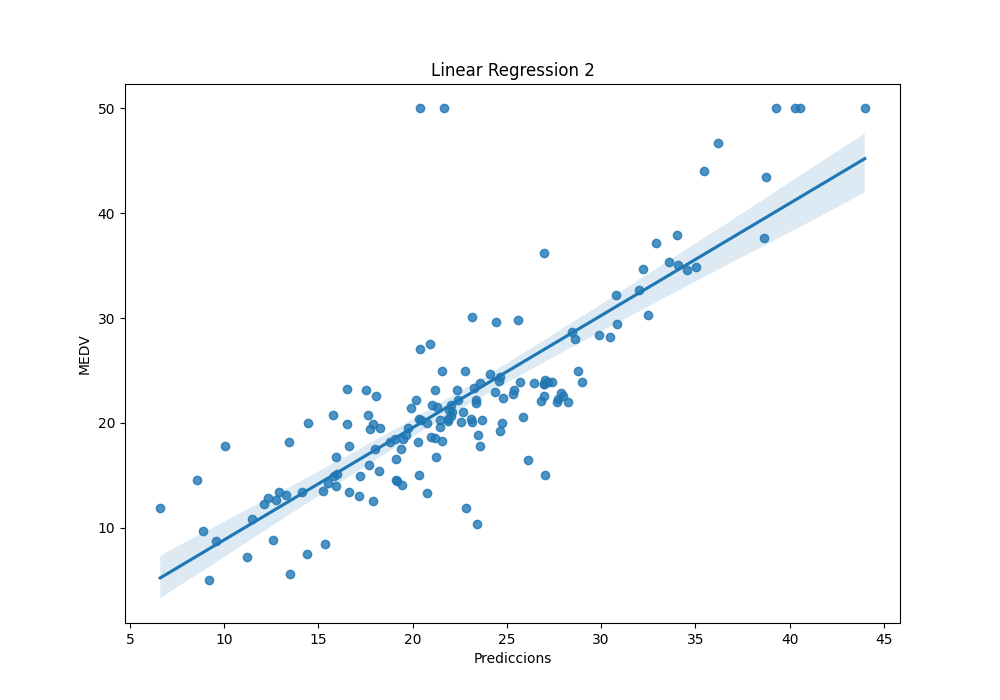

Text(0, 0.5, 'MEDV')

In [152]:
predictions_lr2 = model_lr2.predict(X_test)


print('MAE_lr2 = ', mae(predictions_lr2, y_test))

fig, ax = plt.subplots(figsize=(10,7))
sns.regplot(x=predictions_lr2, y=test['MEDV'])

plt.title('Linear Regression 2')
plt.xlabel('Prediccions')
plt.ylabel('MEDV')

#### El model lr_2, utilitzant només part de les variables ens ha donat un resultat lleugerament pitjor però més simple en termes de quantitat de variables.

Podríem anar jugant una miqueta fins a obtenir un resultat més idóni. Hi ha mètodes com l'esmentat aquí però una mica més sofisticats per analitzar la importància de la variable en el model que ens podria ser molt útil. 
Per finalitzar la regressió linear, partirem del model lr_2 però amb dades normalitzades per veure quin efecte té en els reultats.

In [15]:
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#trans = RobustScaler()
#trans = preprocessing.MinMaxScaler()
trans = StandardScaler()


X_train_norm = trans.fit_transform(X_train)
X_train_norm = sm.add_constant(X_train_norm)


In [17]:
model_lr3 = sm.OLS(y_train, X_train_norm).fit()
print(model_lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     169.3
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           6.81e-91
Time:                        14:45:10   Log-Likelihood:                -1068.2
No. Observations:                 354   AIC:                             2148.
Df Residuals:                     348   BIC:                             2172.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6847      0.265     85.562      0.0

### 1.1 Linear regression with Scikit Learn

Només per comprovar que el mètode de Scikit Learn  obtenim el mateix resultats que amb l'anterior utilitzant les dades del model lr_2

In [73]:
model = LinearRegression().fit(X_train, y_train)

r_sq = model.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")

#intercept
print(f"intercept: {model.intercept_}")

#slope

print(f"slope: {model.coef_}")

coefficient of determination: 0.7353740643230906
intercept: 24.346637587858883
slope: [ 0.00000000e+00 -1.84518498e+01  5.03430647e+00 -1.15873377e+00
 -8.83324508e-01  9.41757540e-03 -4.57839008e-01]


In [72]:
y_pred = model.predict(X_test)
print('MAE_lr2 = ', mae(y_pred, y_test))

MAE_lr2 =  3.61


/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## Random Forest

Anem a explorar un model utilitzant Random Forest. Importarem les llibreríes necessàries i, per començar utilitzarem 100 estimadors.

In [76]:
# Tornem a carregar les dades i utilitzarem totes les variables un altre cop

X_train = train.drop('MEDV', axis=1)
y_train = train['MEDV']

X_test = test.drop('MEDV', axis=1)

y_test = test['MEDV']

X_train, y_train = np.array(X_train), np.array(y_train)

MAE_rf1 =  2.99


/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


<IPython.core.display.Javascript object>


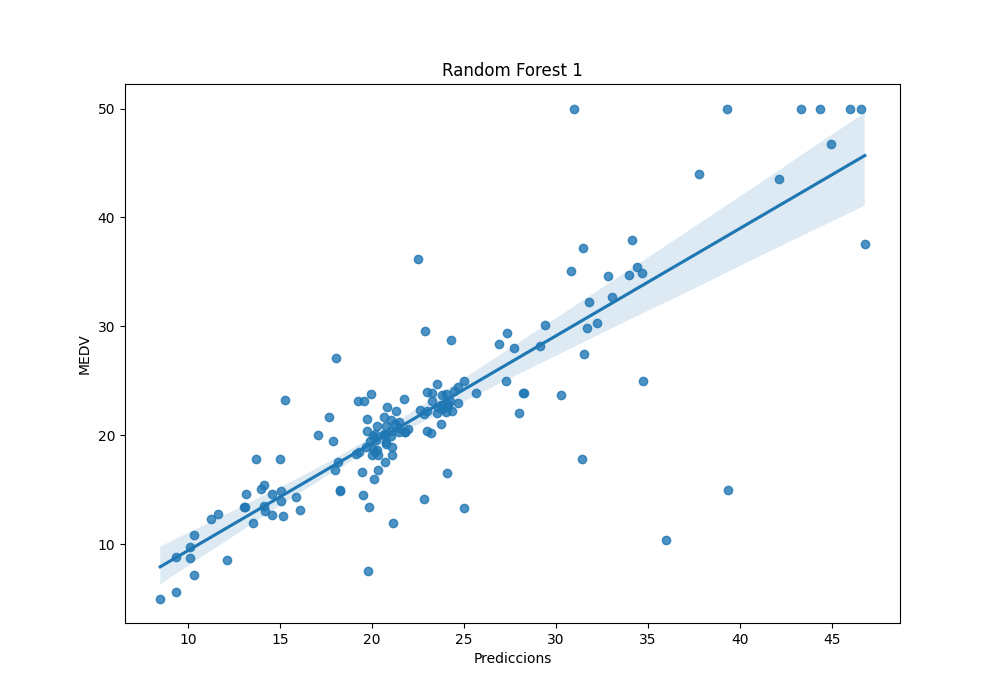

Text(0, 0.5, 'MEDV')

In [147]:
from sklearn.ensemble import RandomForestRegressor

# Definim el model i l'entrenem amb les dades train
model_rf1 = RandomForestRegressor(n_estimators = 100, random_state = 42).fit(X_train, y_train)

predictions_rf1 = model_rf1.predict(X_test)

print('MAE_rf1 = ', mae(predictions_rf1, y_test))

fig, ax = plt.subplots(figsize=(10,7))
sns.regplot(x=predictions_rf1, y=test['MEDV'])

plt.title('Random Forest 1')
plt.xlabel('Prediccions')
plt.ylabel('MEDV')

Hem obtingut un MAE de 3.06. En aquest cas no tenim un l'R². Què passa si utilitzem un múmero major de n_estimators?

In [83]:
model_rf2 = RandomForestRegressor(n_estimators = 10000, random_state = 42).fit(X_train, y_train)

predictions_rf2 = model_rf2.predict(X_test)

print('MAE_rf2 = ', mae(predictions_rf2, y_test))

#fig, ax = plt.subplots(figsize=(10,7))
#sns.regplot(x=predictions_rf2, y=test['MEDV'])

#plt.xlabel('Prediccions')
#plt.ylabel('MEDV')

/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


MAE_rf2 =  3.0


En aquest cas hem augmentat x10 el número d'estimadors. El resultat ha estat lleugerament millor MAE=3.0 però amb grans datasets, degut al temps d'execució potser no valgui la pena ja que ell resultat és similar.

In [92]:
X_train = train[['NOX', 'RM','DIS','PTRATIO', 'B', 'LSTAT']]
y_train = train['MEDV']

X_test = test[['NOX', 'RM','DIS','PTRATIO', 'B', 'LSTAT']]


y_test = test['MEDV']

X_train, y_train = np.array(X_train), np.array(y_train)


A seguir, hem utilitzat el mateix model però amb les 6 variables escollides en el model lr_2. Obtenim un resultat millor, MAE = 2.98

In [87]:
model_rf3 = RandomForestRegressor(n_estimators = 10000, random_state = 42).fit(X_train, y_train)

predictions_rf3 = model_rf3.predict(X_test)

print('MAE_rf3 = ', mae(predictions_rf3, y_test))

/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


MAE_rf3 =  2.98


### Decision Tree

Experimentem ara Decision Tree

In [88]:
from sklearn.tree import DecisionTreeRegressor

In [97]:
# Tornem a carregar les dades i utilitzarem totes les variables un altre cop

X_train = train.drop('MEDV', axis=1)
y_train = train['MEDV']

X_test = test.drop('MEDV', axis=1)

y_test = test['MEDV']

X_train, y_train = np.array(X_train), np.array(y_train)

In [100]:
model_reg1 = DecisionTreeRegressor(random_state=0).fit(X_train,y_train)

predictions_reg1 = model_reg1.predict(X_test)

print('MAE_reg1 = ', mae(predictions_reg1, y_test))


MAE_reg1 =  3.43


/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [103]:
DecisionTreeRegressor?

Hem obtingut un MAE de 3.43. Dins la llibrería del Random Forest hi ha la funció splitter, que per defecte, utilitza 'best' per triar la separació a cada nus. Aquesta es pot randomitzar, serà que ens dóna un millor resultat? ... Sembla que sí, el MAE randomitzant l'splitter és de 2.9 el millor resultat fins ara.

MAE_reg2 =  2.52


/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


<IPython.core.display.Javascript object>


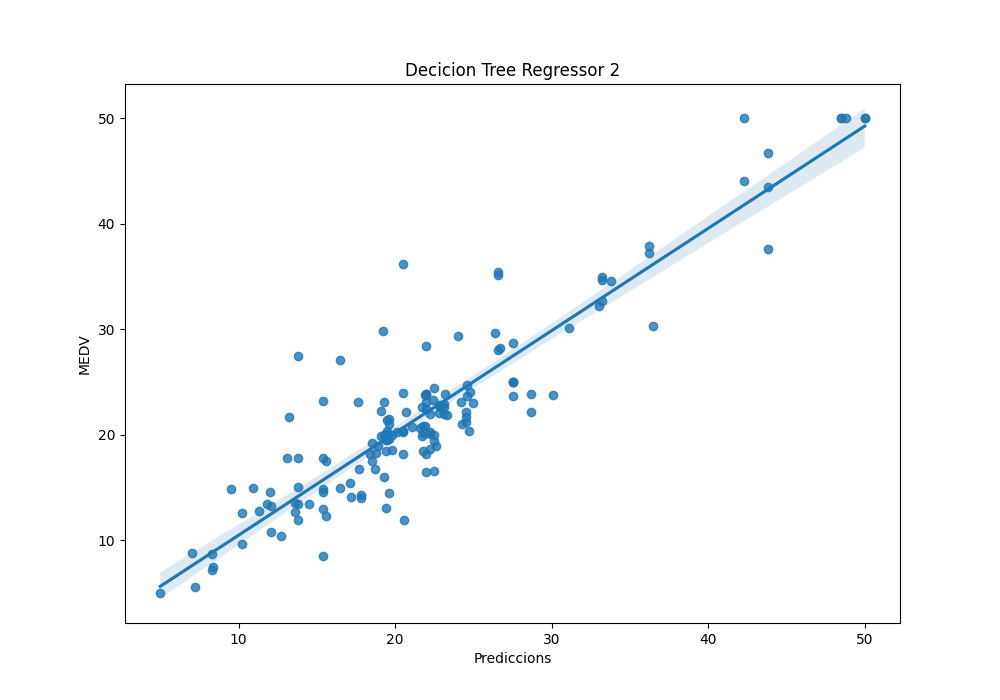

Text(0, 0.5, 'MEDV')

In [146]:
model_reg2 = DecisionTreeRegressor(random_state=0, splitter='random').fit(X_train,y_train)

predictions_reg2 = model_reg2.predict(X_test)

print('MAE_reg2 = ', mae(predictions_reg2, y_test))

fig, ax = plt.subplots(figsize=(10,7))
sns.regplot(x=predictions_reg2, y=test['MEDV'])

plt.title('Decicion Tree Regressor 2')
plt.xlabel('Prediccions')
plt.ylabel('MEDV')

### NN

Finalment experimentarem amb Neural Networks fent servir la llibreria sklearn.neural_network.
Hi ha moltes maneres de parametritzar reds neurals. Aquí només exemplificarem alguns exemples modifican el número d'interaccions i la funció d'activació per veure com cambia el MAE

In [109]:
# definim features X i target y per l'entrenament i els tests per la regressió linear.

X_train = train.drop('MEDV', axis=1)
y_train = train['MEDV']

X_test = test.drop('MEDV', axis=1)
X_test = sm.add_constant(X_test)

y_test = test['MEDV']

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = sm.add_constant(X_train)


- Max_iter = 100, activation=tanh

In [139]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
model_nn1 = MLPRegressor(random_state=10, max_iter=100, activation='tanh').fit(X_train, y_train)

predictions_nn1 = model_nn1.predict(X_test)

print('MAE_nn1 = ', mae(predictions_nn1, y_test))

MAE_nn1 =  6.33


/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


- Max_iter = 1000, activation=tanh

In [142]:
model_nn2 = MLPRegressor(random_state=10, max_iter=1000, activation='tanh', learning_rate='adaptive').fit(X_train, y_train)

predictions_nn2 = model_nn2.predict(X_test)

print('MAE_nn2 = ', mae(predictions_nn2, y_test))

MAE_nn2 =  3.48


/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


In [143]:
model_nn3 = MLPRegressor(random_state=10, max_iter=1000, activation='relu', learning_rate='adaptive',
                         ).fit(X_train, y_train)

predictions_nn3 = model_nn3.predict(X_test)

print('MAE_nn3 = ', mae(predictions_nn3, y_test))

MAE_nn3 =  2.88


/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


<IPython.core.display.Javascript object>


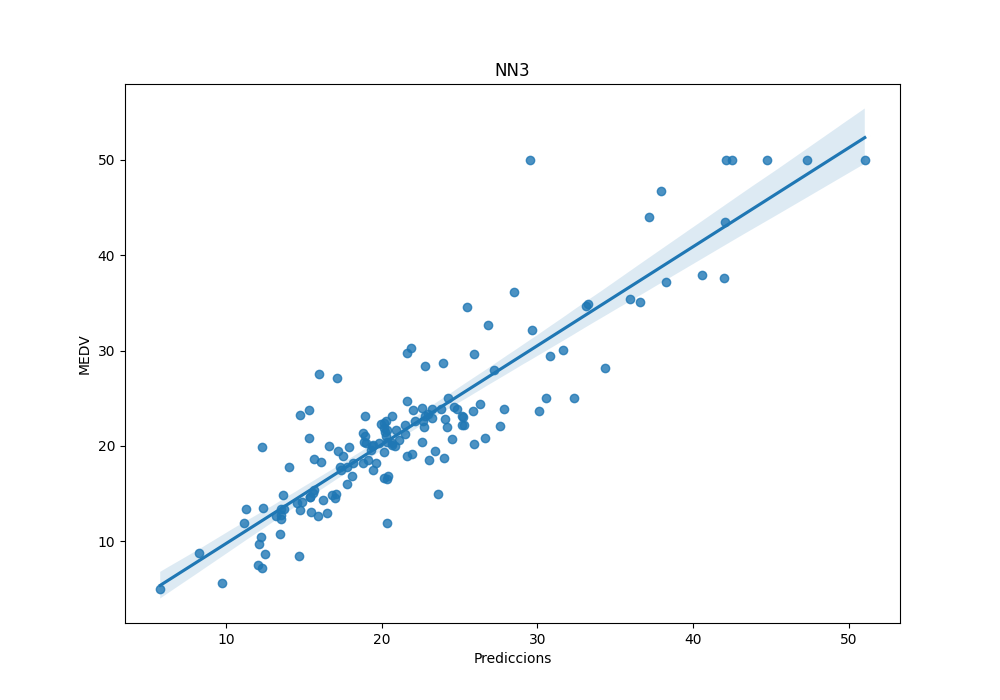

Text(0, 0.5, 'MEDV')

In [145]:
fig, ax = plt.subplots(figsize=(10,7))
sns.regplot(x=predictions_nn3, y=test['MEDV'])


plt.title('NN3')
plt.xlabel('Prediccions')
plt.ylabel('MEDV')

### Conclusions

Hem utilitzat diferents models de regressió per tal d'intentar preveure el preu dels habitatges al dataset housing. Hem explorat els model multilinears els quals ens han donat resultats acceptables però amb problemes de multicolinearitat. Hem obtingut R² de 0.748 utilitzant totes les variables i de 0.735 utilitant-te sis de rellevants. Pel que fa al MAE (mean absolute error) hem obtingut un 3.39 en el primer cas i 3.61 en el segon. 

Després hem experimentat els models Random Forest amb millors resultats que la regressió linear comparant els MAE. El millor resultat obtingut ha estat un error mitjà absolut de 2.98.

El millor resultat obtingut pel mètode de Decision Tree ha estat 2.52, millorant l'anterior i el millor de tots els models provats.

Finalment, utilitzant reds neurals NN hem aconseguit reduir l'error absolut mitjà fins a 2.88 el que ha estat el segon millor resultat.

Val a dir que aquest ha estat un exercíci per conèixer els diferents mètodes i no han estat explorats en profunditat per intentar millorar el resultat. De totes maneres, els resultats predictius han estat bastant bons per una primera aproximació de cada un dels models. 

En tots els casos s'han dividit les dades en train i test per tal de poder fer els gràfics comparatius. Això en general evita un *overfitting*. Però com rqueria un dels exercicis, anem a entrenar un dels models amb totes les dades per veure si hhi ha una millora. 

In [160]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

model_nn4 = MLPRegressor(random_state=10, max_iter=1000, activation='relu', learning_rate='adaptive',
                         ).fit(X, y)
predictions_nn4 = model_nn4.predict(X)

print('MAE_nn4 = ', mae(predictions_nn4, y))

MAE_nn4 =  2.95


Hem agafat el segon millor resultat NN3 i l'hem utilitzat entrenant-lo amb totes les dades. El resultat, tot hi haver-hi més dades que en el dataset train, no millora l'executat amb dades només d'entrenament.

In [163]:
model_reg3 = DecisionTreeRegressor(random_state=0, splitter='random').fit(X,y)

predictions_reg3 = model_reg3.predict(X)

print('MAE_reg3 = ', mae(predictions_reg3, y))

MAE_reg3 =  0.0


Ja amb el model de Decision Tree, millor resultat, ens dona un problema clar d'overfitting. El model és excelent per les dades d'entrenament però no per dades noves.

<IPython.core.display.Javascript object>


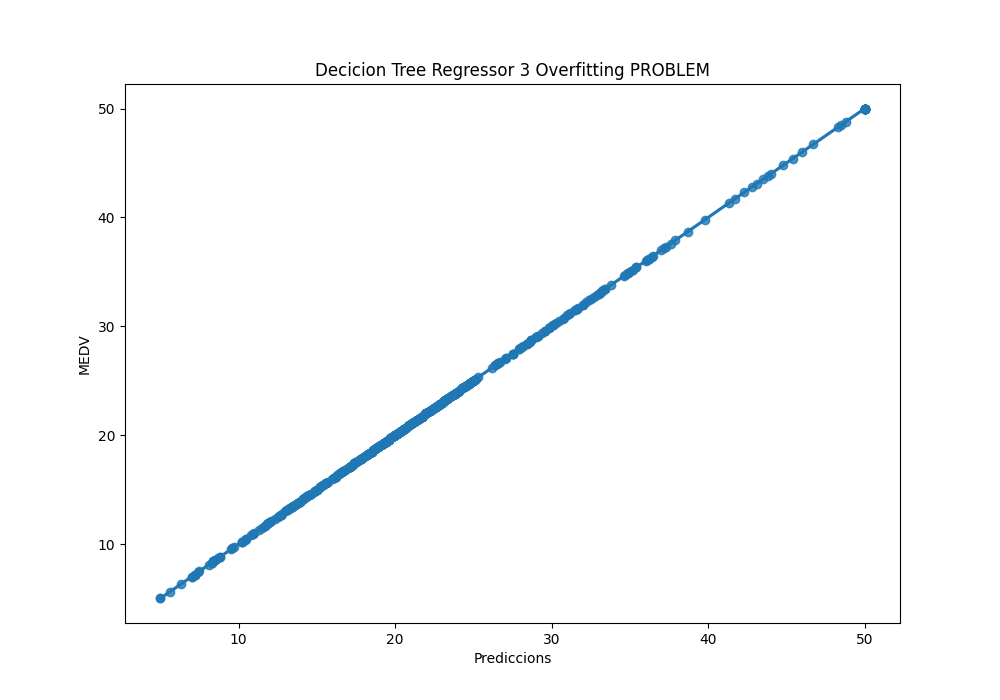

Text(0, 0.5, 'MEDV')

In [166]:
fig, ax = plt.subplots(figsize=(10,7))
sns.regplot(x=predictions_reg3, y=y)

plt.title('Decicion Tree Regressor 3 Overfitting PROBLEM')
plt.xlabel('Prediccions')
plt.ylabel('MEDV')